# SIMPLE LINEAR REGRESSION

**STEPS**
1. Read the datSet
2. EDA , FE
3. Divide our dataset into dependent and independent features
4. Further divide the dataset into train and test
5. Standard Scaling



In [ ]:
!cd

/root


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/SOCR-HeightWeight.csv')

In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Text(0, 0.5, 'ht')

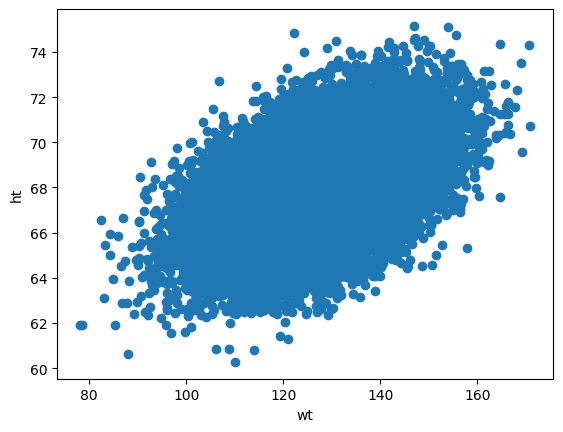

In [5]:
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel("wt")
plt.ylabel("ht")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [7]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [8]:
df.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

# DIVIDING INTO DEPENDENT AND INDEPENDENT FEATURES

In [10]:
X = df[['Weight(Pounds)']] #indep feature
Y = df['Height(Inches)'] #dep feature

In [14]:
Y.shape , X.shape

((25000,), (25000, 1))

# DIVIDING DATASET INTO TRAIN AND TEST

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=43)

In [17]:
X_train.shape , Y_train.shape

((17500, 1), (17500,))

In [18]:
X_test.shape , Y_test.shape

((7500, 1), (7500,))

# STANDARD SCALING OF THE DATASET ON TRAIN AND TEST


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [69]:
original_x_test = X_test

In [23]:
X_test = scaler.transform(X_test)

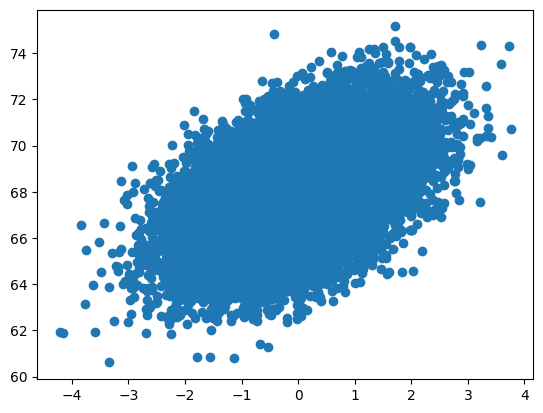

In [24]:
plt.scatter(X_train,Y_train)

# MODEL TRAINING

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor = LinearRegression()

In [28]:
# Training the train data

In [29]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [30]:
# to find the intercept of our best fit line

In [32]:
regressor.intercept_

67.99251767085714

In [33]:
regressor.coef_

array([0.95136443])

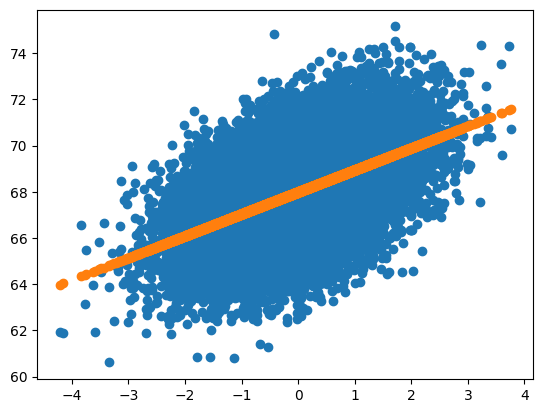

In [35]:
plt.scatter(X_train,Y_train)
plt.scatter(X_train,regressor.predict(X_train))

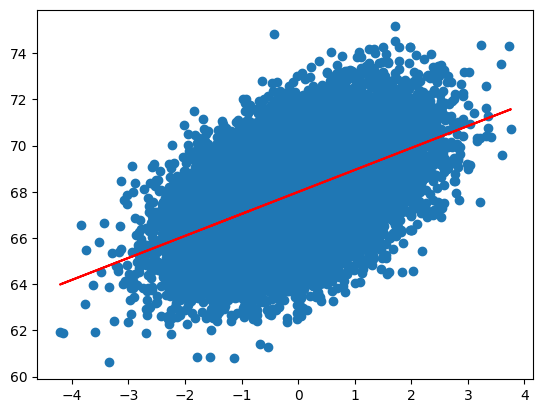

In [38]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

# Prediction of test data

In [39]:
y_predict_test = regressor.predict(X_test)

In [40]:
y_predict_test

array([67.46669911, 68.84299217, 69.06599721, ..., 66.29837375,
       68.72328931, 69.4840633 ])

In [41]:
Y_test

11149    68.52434
8043     66.50511
2831     66.33367
4607     68.16448
3494     69.70960
           ...   
23626    69.72472
15902    69.72084
4919     64.55365
10657    67.90062
5715     68.97830
Name: Height(Inches), Length: 7500, dtype: float64

# Performance metrices

In [43]:
#MEA

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [46]:
mse = mean_squared_error(Y_test,y_predict_test)
mae = mean_absolute_error(Y_test,y_predict_test)
rmse = np.sqrt(mse)

In [47]:
print(mse)
print(mae)
print(rmse)

2.6950442883789307
1.3047572047144271
1.641659004902946


# Accuracy of the model

In [48]:
# Rsquared and adjusted Rsquared

In [50]:
from sklearn.metrics import r2_score

In [51]:
score = r2_score(Y_test,y_predict_test)
score

0.2578042440741022

In [52]:
  # Adjusted R square

In [53]:
1-(1-score)*len((Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.2576062724134125

In [55]:
scaler

StandardScaler()

In [56]:
regressor

LinearRegression()

TO SAVE THE MODEL WE NEED TO USE LIBRARY CALLED PICKLE


In [57]:
import pickle

In [58]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regressor,open('regressor.pkl','wb'))

NOW IF WE WANT TO USE THOSE MODEL AGAIN THEN WE CAN DO BY:

In [59]:
imported_model_regressor = pickle.load(open('regressor.pkl','rb'))

In [60]:
# now we can predict from this also

In [61]:
imported_model_regressor.predict(X_test)

array([67.46669911, 68.84299217, 69.06599721, ..., 66.29837375,
       68.72328931, 69.4840633 ])

In [62]:
# similarly we have scaler model to trainsform our test model if our actual input is not scaled

In [63]:
imported_model_scaler = pickle.load(open('scaler.pkl','rb'))

In [70]:
# now by using this we can do the required scaling by using imported_model_scaler.trainsform(our test data of x) and finally we use then imported regressor to predict